# Data Transformation and Visualization with Pandas

## Instructions:
This notebook contains a real-life dataset with dirty, malformed data, and outliers.
Your goal is to clean, transform, analyze, and visualize the data using **Pandas** and **Matplotlib**.

Complete the following tasks step by step. If you get stuck, refer to the [Pandas documentation](https://pandas.pydata.org/docs/) for help.

At the end of this notebook, the solutions will be provided. Attempt all tasks first before checking the solutions!

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
import seaborn as sns

# ----------------------------
# 1. Generate a Dirty Dataset
# ----------------------------

In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
# Create a dataframe with dirty data
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': [' Alice', 'BOB', 'Catherine', 'David ', 'Eve', 'frank', 'Gina', 'Henry', 'Ivy', 'Jack'],
    'Age': [23, 35, np.nan, 45, 29, 34, -1, 120, 25, 40],  # Missing and outlier values
    'Salary ($)': [50000, 60000, 75000, 80000, None, 120000, 45000, None, 70000, 62000],
    'Joining_Date': ['2021-01-15', '2020-06-10', '2023-03-01', '2020-12-10', None, '2019-08-20',
                     '2021-11-15', '2020-06-10', '2023-01-01', '2018-09-25'],
    'Department': ['HR', 'Sales', 'HR', 'IT', 'IT', 'Finance', 'Sales', 'Sales', 'HR', 'Finance'],
    'Performance_Score': ["A", "B", "C", "A", "B", "Invalid", "C", "A", "B", "A"]
}

In [4]:
# Create dataframe
df = pd.DataFrame(data)

In [5]:
# Introduce duplicate rows, malformed data, and extreme outliers
df.loc[10] = [10, 'Jack', 40, 62000, '2018-09-25', 'Finance', 'A']  # Duplicate row
df.loc[11] = [11, None, None, None, None, None, None]               # Malformed row
df.loc[12] = [12, 'Outlier', 200, 1000000, '2023-04-01', 'IT', 'A']  # Extreme outlier

In [6]:
# Display the initial dataset
print("Initial Dirty Dataset:")
display(df)

Initial Dirty Dataset:


,ID,Name,Age,Salary ($),Joining_Date,Department,Performance_Score
0,1.0,Alice,23.0,50000.0,2021-01-15,HR,A
1,2.0,BOB,35.0,60000.0,2020-06-10,Sales,B
2,3.0,Catherine,NaN,75000.0,2023-03-01,HR,C
3,4.0,David,45.0,80000.0,2020-12-10,IT,A
4,5.0,Eve,29.0,NaN,None,IT,B
5,6.0,frank,34.0,120000.0,2019-08-20,Finance,Invalid
6,7.0,Gina,-1.0,45000.0,2021-11-15,Sales,C
7,8.0,Henry,120.0,NaN,2020-06-10,Sales,A
8,9.0,Ivy,25.0,70000.0,2023-01-01,HR,B
9,10.0,Jack,40.0,62000.0,2018-09-25,Finance,A


In [7]:
# Save the initial dataset as CSV (for later use)
df.to_csv('dirty_data.csv', index=False)

# -------------------------------------------------
# 2. Tasks for Students - Perform the following
# -------------------------------------------------


## TASK 1: Handle Missing Values
1. Replace all `NaN` values in the "Age" column with the mean age.
2. Replace all `NaN` values in the "Salary ($)" column with the median salary.
3. Drop rows where "Name" or "Joining_Date" are missing.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html


In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-20-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [19]:
df['Salary ($)'].fillna(df['Salary ($)'].mean(), inplace=True)

<ipython-input-19-e31e93ca3a99>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary ($)'].fillna(df['Salary ($)'].mean(), inplace=True)


In [13]:
df.dropna(subset=['Name', 'Joining_Date'], inplace=True)

In [21]:
df

,ID,Name,Age,Salary ($),Joining_Date,Department,Performance_Score
0,1.0,Alice,23.0,50000.0,2021-01-15,HR,A
1,2.0,BOB,35.0,60000.0,2020-06-10,Sales,B
2,3.0,Catherine,56.1,75000.0,2023-03-01,HR,C
3,4.0,David,45.0,80000.0,2020-12-10,IT,A
5,6.0,frank,34.0,120000.0,2019-08-20,Finance,Invalid
6,7.0,Gina,-1.0,45000.0,2021-11-15,Sales,C
7,8.0,Henry,120.0,162400.0,2020-06-10,Sales,A
8,9.0,Ivy,25.0,70000.0,2023-01-01,HR,B
9,10.0,Jack,40.0,62000.0,2018-09-25,Finance,A
10,10.0,Jack,40.0,62000.0,2018-09-25,Finance,A


## TASK 2: Remove Duplicates
1. Identify duplicate rows.
2. Drop duplicate rows.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
5,False
6,False
7,False
8,False
9,False
10,True


In [22]:
df.drop_duplicates(inplace=True)

## TASK 3: Clean Text Columns
1. Remove leading/trailing whitespaces from the "Name" column.
2. Convert all names to title case (e.g., 'alice' -> 'Alice').

Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html

In [31]:
df['Name'] = df['Name'].str.strip(' ')
df['Name'] = df['Name'].str.title()

In [30]:
df

,ID,Name,Age,Salary ($),Joining_Date,Department,Performance_Score
0,1.0,Alice,23.0,50000.0,2021-01-15,HR,A
1,2.0,BOB,35.0,60000.0,2020-06-10,Sales,B
2,3.0,Catherine,56.1,75000.0,2023-03-01,HR,C
3,4.0,David,45.0,80000.0,2020-12-10,IT,A
5,6.0,frank,34.0,120000.0,2019-08-20,Finance,Invalid
6,7.0,Gina,-1.0,45000.0,2021-11-15,Sales,C
7,8.0,Henry,120.0,162400.0,2020-06-10,Sales,A
8,9.0,Ivy,25.0,70000.0,2023-01-01,HR,B
9,10.0,Jack,40.0,62000.0,2018-09-25,Finance,A
12,12.0,Outlier,200.0,1000000.0,2023-04-01,IT,A


## TASK 4: Handle Outliers
1. Visualize outliers in the "Age" and "Salary ($)" columns using boxplots.
2. Replace negative values in the "Age" column with the column's mean.
3. Cap the "Age" column values to 100.
4. Remove rows where the "Salary ($)" column is greater than 300,000.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html

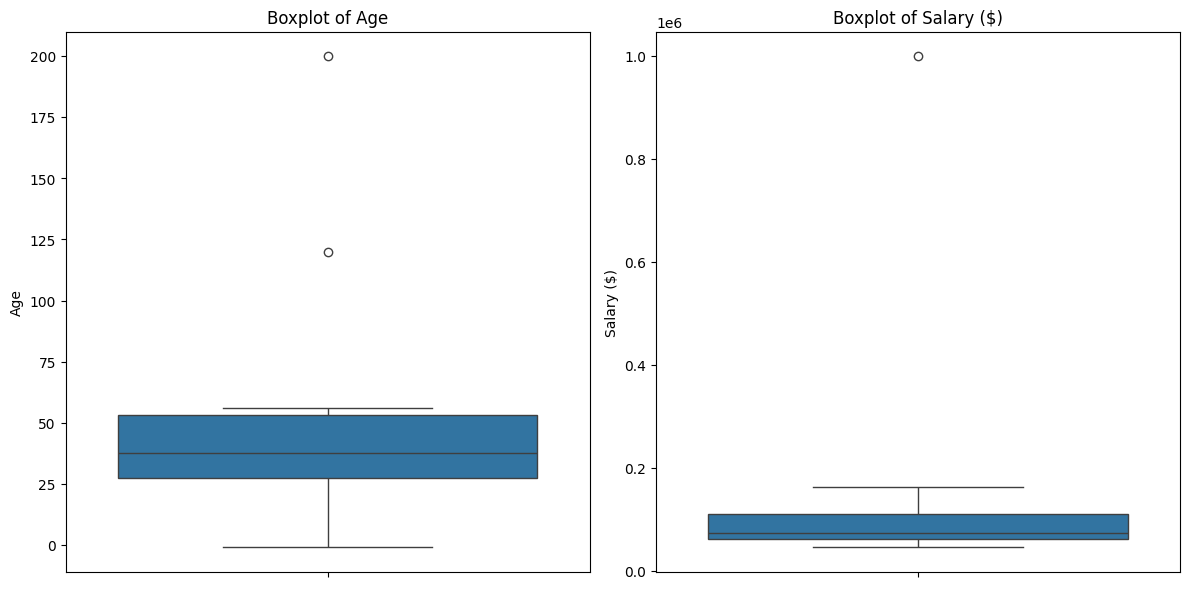

In [34]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

# Boxplot for Salary
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(y=df['Salary ($)'])
plt.title('Boxplot of Salary ($)')

# Show the plots
plt.tight_layout()
plt.show()

In [35]:
# 1. Replace negative values in the "Age" column with the column's mean
mean_age = df.loc[df['Age'] >= 0, 'Age'].mean()  # Calculate mean without negative values
df['Age'] = df['Age'].apply(lambda x: mean_age if x < 0 else x)

# 2. Cap the "Age" column values to 100
df['Age'] = df['Age'].clip(upper=100)

# 3. Remove rows where the "Salary ($)" column is greater than 300,000
df = df[df['Salary ($)'] <= 300000]

In [36]:
df

,ID,Name,Age,Salary ($),Joining_Date,Department,Performance_Score
0,1.0,Alice,23.000000,50000.0,2021-01-15,HR,A
1,2.0,Bob,35.000000,60000.0,2020-06-10,Sales,B
2,3.0,Catherine,56.100000,75000.0,2023-03-01,HR,C
3,4.0,David,45.000000,80000.0,2020-12-10,IT,A
5,6.0,Frank,34.000000,120000.0,2019-08-20,Finance,Invalid
6,7.0,Gina,64.233333,45000.0,2021-11-15,Sales,C
7,8.0,Henry,100.000000,162400.0,2020-06-10,Sales,A
8,9.0,Ivy,25.000000,70000.0,2023-01-01,HR,B
9,10.0,Jack,40.000000,62000.0,2018-09-25,Finance,A


## TASK 5: Data Type Conversion
1. Convert the "Joining_Date" column to datetime format.
2. Extract the year from the "Joining_Date" column and store it in a new column "Joining_Year".

Reference: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [39]:
# 1. Convert the "Joining_Date" column to datetime format
df['Joining_Date'] = pd.to_datetime(df['Joining_Date'])

# 2. Extract the year from the "Joining_Date" column and store it in a new column "Joining_Year"
df['Joining_Year'] = df['Joining_Date'].dt.year

# Display the DataFrame
print(df)

     ID       Name         Age  Salary ($) Joining_Date Department  \
0   1.0      Alice   23.000000     50000.0   2021-01-15         HR   
1   2.0        Bob   35.000000     60000.0   2020-06-10      Sales   
2   3.0  Catherine   56.100000     75000.0   2023-03-01         HR   
3   4.0      David   45.000000     80000.0   2020-12-10         IT   
5   6.0      Frank   34.000000    120000.0   2019-08-20    Finance   
6   7.0       Gina   64.233333     45000.0   2021-11-15      Sales   
7   8.0      Henry  100.000000    162400.0   2020-06-10      Sales   
8   9.0        Ivy   25.000000     70000.0   2023-01-01         HR   
9  10.0       Jack   40.000000     62000.0   2018-09-25    Finance   

  Performance_Score  Joining_Year  
0                 A          2021  
1                 B          2020  
2                 C          2023  
3                 A          2020  
5           Invalid          2019  
6                 C          2021  
7                 A          2020  
8          

<ipython-input-39-b411a3abb323>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Joining_Date'] = pd.to_datetime(df['Joining_Date'])
<ipython-input-39-b411a3abb323>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Joining_Year'] = df['Joining_Date'].dt.year


## TASK 6: Aggregation and GroupBy
1. Find the average "Salary" for each "Department".
2. Count the number of employees in each department.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [38]:
# 1. Average Salary for each Department
average_salary = df.groupby('Department')['Salary ($)'].mean()

# 2. Number of Employees in each Department
employee_count = df.groupby('Department')['ID'].count()

# Display Results
print("Average Salary for Each Department:")
print(average_salary)

print("\nNumber of Employees in Each Department:")
print(employee_count)

Average Salary for Each Department:
Department
Finance    91000.000000
HR         65000.000000
IT         80000.000000
Sales      89133.333333
Name: Salary ($), dtype: float64

Number of Employees in Each Department:
Department
Finance    2
HR         3
IT         1
Sales      3
Name: ID, dtype: int64


## TASK 7: Visualization with Matplotlib
1. Plot a bar chart showing average salary by department.
2. Plot a histogram of the "Age" column.
3. Plot a line chart showing the count of employees who joined each year.
4. Add a final step: Visualize the cleaned dataset's boxplots for "Age" and "Salary ($)" to confirm outliers are handled.

Reference: https://matplotlib.org/stable/gallery/index.html

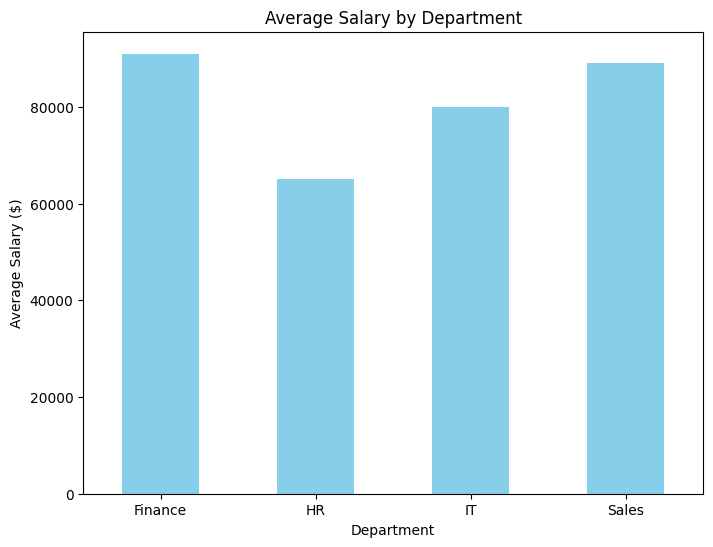

In [42]:
# 1. Bar chart: Average salary by department
plt.figure(figsize=(8, 6))
avg_salary = df.groupby('Department')['Salary ($)'].mean()
avg_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Department')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=0) #The rotation argument allows you to rotate the x-axis tick labels by a specified angle. The default value is 0, which means the labels will be displayed horizontally.
plt.show()

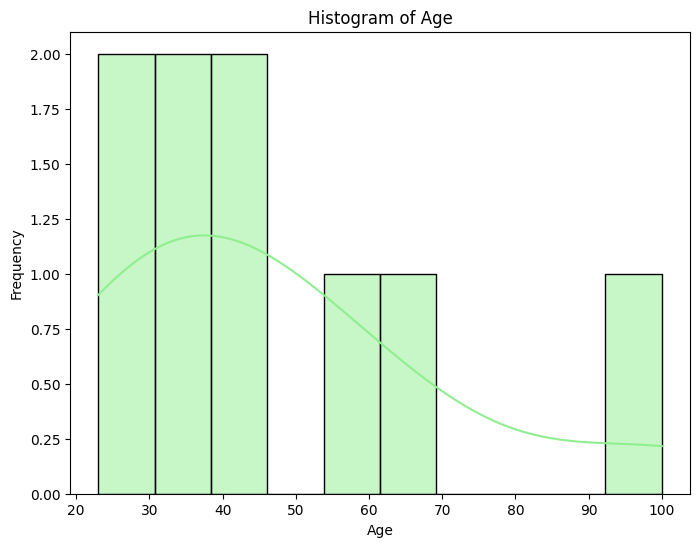

In [43]:
# 2. Histogram: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='lightgreen')
          #bins=10: Sets the number of bins (intervals) to 10 for the histogram.
          #kde=True: Adds a Kernel Density Estimate (KDE) curve on top of the histogram to show the distribution of the data.
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

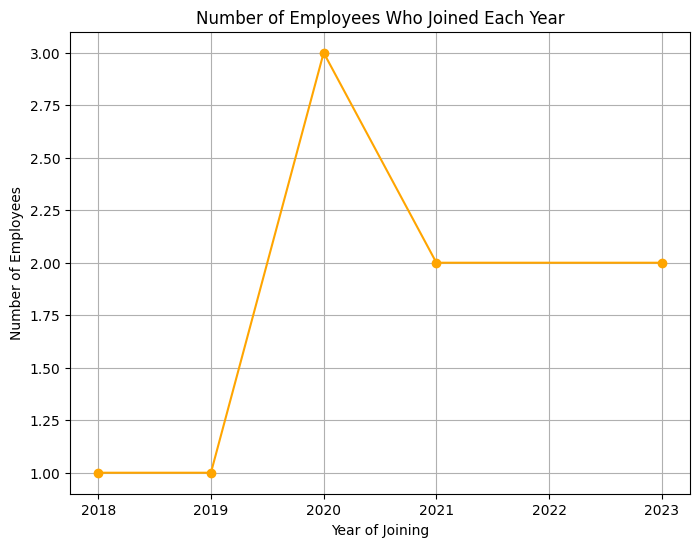

In [44]:
# 3. Line chart: Number of employees who joined each year
employee_count_by_year = df.groupby('Joining_Year')['Salary ($)'].count()
plt.figure(figsize=(8, 6))
employee_count_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Employees Who Joined Each Year')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

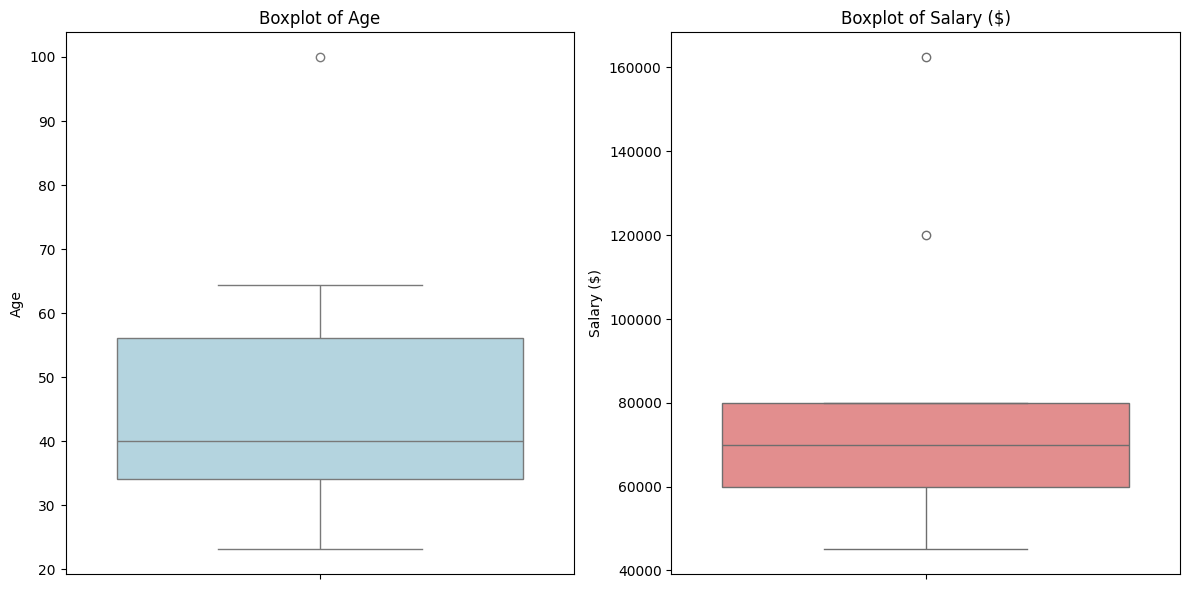

In [45]:
# 4. Boxplots: 'Age' and 'Salary ($)' columns
plt.figure(figsize=(12, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'], color='lightblue')
plt.title('Boxplot of Age')

# Boxplot for Salary ($)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary ($)'], color='lightcoral')
plt.title('Boxplot of Salary ($)')

plt.tight_layout()
plt.show()


## TASK 8: Extract Initials
1. Extract the first letter of each name and create a new column "Initial".

Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html

In [46]:
# Extract the first letter of each name and create a new column "Initial"
df['Initial'] = df['Name'].str[0]

# Display the DataFrame
print(df)

     ID       Name         Age  Salary ($) Joining_Date Department  \
0   1.0      Alice   23.000000     50000.0   2021-01-15         HR   
1   2.0        Bob   35.000000     60000.0   2020-06-10      Sales   
2   3.0  Catherine   56.100000     75000.0   2023-03-01         HR   
3   4.0      David   45.000000     80000.0   2020-12-10         IT   
5   6.0      Frank   34.000000    120000.0   2019-08-20    Finance   
6   7.0       Gina   64.233333     45000.0   2021-11-15      Sales   
7   8.0      Henry  100.000000    162400.0   2020-06-10      Sales   
8   9.0        Ivy   25.000000     70000.0   2023-01-01         HR   
9  10.0       Jack   40.000000     62000.0   2018-09-25    Finance   

  Performance_Score  Joining_Year Initial  
0                 A          2021       A  
1                 B          2020       B  
2                 C          2023       C  
3                 A          2020       D  
5           Invalid          2019       F  
6                 C          2021  

<ipython-input-46-66c7d3860bda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Initial'] = df['Name'].str[0]


## TASK 9: Replace Values in Columns
1. Replace "Invalid" in the "Performance_Score" column with "D".

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [47]:
# Replace "Invalid" in the "Performance_Score" column with "D"
df['Performance_Score'] = df['Performance_Score'].replace('Invalid', 'D')

# Display the updated DataFrame
print(df)

     ID       Name         Age  Salary ($) Joining_Date Department  \
0   1.0      Alice   23.000000     50000.0   2021-01-15         HR   
1   2.0        Bob   35.000000     60000.0   2020-06-10      Sales   
2   3.0  Catherine   56.100000     75000.0   2023-03-01         HR   
3   4.0      David   45.000000     80000.0   2020-12-10         IT   
5   6.0      Frank   34.000000    120000.0   2019-08-20    Finance   
6   7.0       Gina   64.233333     45000.0   2021-11-15      Sales   
7   8.0      Henry  100.000000    162400.0   2020-06-10      Sales   
8   9.0        Ivy   25.000000     70000.0   2023-01-01         HR   
9  10.0       Jack   40.000000     62000.0   2018-09-25    Finance   

  Performance_Score  Joining_Year Initial  
0                 A          2021       A  
1                 B          2020       B  
2                 C          2023       C  
3                 A          2020       D  
5                 D          2019       F  
6                 C          2021  

<ipython-input-47-c25780277998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Performance_Score'] = df['Performance_Score'].replace('Invalid', 'D')


## TASK 10: Add Calculated Columns
1. Create a new column "Salary_in_Lacs" by dividing "Salary ($)" by 100,000.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html

In [48]:
df['Salary_in_Lacs'] = df['Salary ($)'] / 100000

<ipython-input-48-03f1d6e95526>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_in_Lacs'] = df['Salary ($)'] / 100000


## TASK 11: Normalize Salary
1. Normalize the "Salary ($)" column so that all values fall between 0 and 1.

Hint: Use min-max normalization.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html

In [49]:
# Normalize the "Salary ($)" column to range between 0 and 1
df['Normalized_Salary'] = (df['Salary ($)'] - df['Salary ($)'].min()) / (df['Salary ($)'].max() - df['Salary ($)'].min())

# Display the updated DataFrame
print(df)

     ID       Name         Age  Salary ($) Joining_Date Department  \
0   1.0      Alice   23.000000     50000.0   2021-01-15         HR   
1   2.0        Bob   35.000000     60000.0   2020-06-10      Sales   
2   3.0  Catherine   56.100000     75000.0   2023-03-01         HR   
3   4.0      David   45.000000     80000.0   2020-12-10         IT   
5   6.0      Frank   34.000000    120000.0   2019-08-20    Finance   
6   7.0       Gina   64.233333     45000.0   2021-11-15      Sales   
7   8.0      Henry  100.000000    162400.0   2020-06-10      Sales   
8   9.0        Ivy   25.000000     70000.0   2023-01-01         HR   
9  10.0       Jack   40.000000     62000.0   2018-09-25    Finance   

  Performance_Score  Joining_Year Initial  Salary_in_Lacs  Normalized_Salary  
0                 A          2021       A           0.500           0.042589  
1                 B          2020       B           0.600           0.127768  
2                 C          2023       C           0.750     

<ipython-input-49-fe397630309b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized_Salary'] = (df['Salary ($)'] - df['Salary ($)'].min()) / (df['Salary ($)'].max() - df['Salary ($)'].min())


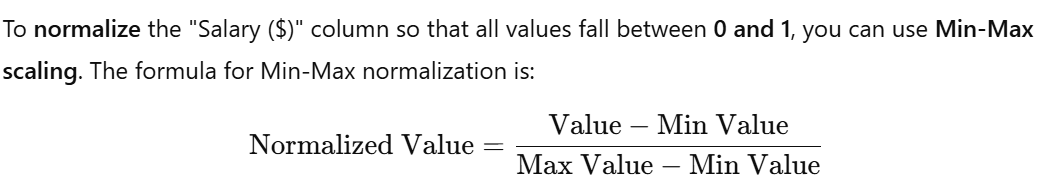

## TASK 12: Concatenate Columns
1. Create a new column "Name_Department" that combines "Name" and "Department".

Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html

In [50]:
df['Name_Department'] = df['Name'] + ' - ' + df['Department']


<ipython-input-50-4ff9484d6bfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name_Department'] = df['Name'] + ' - ' + df['Department']


## TASK 13: Filter Rows
1. Filter rows where "Salary ($)" is greater than 60000 and "Age" is less than 40.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [51]:
# Filter rows where "Salary ($)" is greater than 60000 and "Age" is less than 40
filtered_df = df[(df['Salary ($)'] > 60000) & (df['Age'] < 40)]

# Display the filtered DataFrame
print(filtered_df)

    ID   Name   Age  Salary ($) Joining_Date Department Performance_Score  \
5  6.0  Frank  34.0    120000.0   2019-08-20    Finance                 D   
8  9.0    Ivy  25.0     70000.0   2023-01-01         HR                 B   

   Joining_Year Initial  Salary_in_Lacs  Normalized_Salary  Name_Department  
5          2019       F             1.2           0.638842  Frank - Finance  
8          2023       I             0.7           0.212947         Ivy - HR  


## TASK 14: Drop Columns
1. Drop the "ID" column from the dataset.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [52]:
# Drop the "ID" column
df = df.drop('ID', axis=1)

# Display the updated DataFrame
print(df)

        Name         Age  Salary ($) Joining_Date Department  \
0      Alice   23.000000     50000.0   2021-01-15         HR   
1        Bob   35.000000     60000.0   2020-06-10      Sales   
2  Catherine   56.100000     75000.0   2023-03-01         HR   
3      David   45.000000     80000.0   2020-12-10         IT   
5      Frank   34.000000    120000.0   2019-08-20    Finance   
6       Gina   64.233333     45000.0   2021-11-15      Sales   
7      Henry  100.000000    162400.0   2020-06-10      Sales   
8        Ivy   25.000000     70000.0   2023-01-01         HR   
9       Jack   40.000000     62000.0   2018-09-25    Finance   

  Performance_Score  Joining_Year Initial  Salary_in_Lacs  Normalized_Salary  \
0                 A          2021       A           0.500           0.042589   
1                 B          2020       B           0.600           0.127768   
2                 C          2023       C           0.750           0.255537   
3                 A          2020      

## TASK 15: Sort Data
1. Sort the dataset by "Age" in ascending order and "Salary ($)" in descending order.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [53]:
df = df.sort_values(by=['Age', 'Salary ($)'], ascending=[True, False])

In [54]:
df

,Name,Age,Salary ($),Joining_Date,Department,Performance_Score,Joining_Year,Initial,Salary_in_Lacs,Normalized_Salary,Name_Department
0,Alice,23.000000,50000.0,2021-01-15,HR,A,2021,A,0.500,0.042589,Alice - HR
8,Ivy,25.000000,70000.0,2023-01-01,HR,B,2023,I,0.700,0.212947,Ivy - HR
5,Frank,34.000000,120000.0,2019-08-20,Finance,D,2019,F,1.200,0.638842,Frank - Finance
1,Bob,35.000000,60000.0,2020-06-10,Sales,B,2020,B,0.600,0.127768,Bob - Sales
9,Jack,40.000000,62000.0,2018-09-25,Finance,A,2018,J,0.620,0.144804,Jack - Finance
3,David,45.000000,80000.0,2020-12-10,IT,A,2020,D,0.800,0.298126,David - IT
2,Catherine,56.100000,75000.0,2023-03-01,HR,C,2023,C,0.750,0.255537,Catherine - HR
6,Gina,64.233333,45000.0,2021-11-15,Sales,C,2021,G,0.450,0.000000,Gina - Sales
7,Henry,100.000000,162400.0,2020-06-10,Sales,A,2020,H,1.624,1.000000,Henry - Sales


## TASK 16: Create a Pivot Table
1. Create a pivot table that shows the average "Salary ($)" for each "Department" and "Performance_Score".

Reference: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [55]:
# Create a pivot table to show the average "Salary ($)" for each "Department" and "Performance_Score"
pivot_table = df.pivot_table(values='Salary ($)',
                             index='Department',
                             columns='Performance_Score',
                             aggfunc='mean')

# Display the pivot table
print(pivot_table)

Performance_Score         A        B        C         D
Department                                             
Finance             62000.0      NaN      NaN  120000.0
HR                  50000.0  70000.0  75000.0       NaN
IT                  80000.0      NaN      NaN       NaN
Sales              162400.0  60000.0  45000.0       NaN


## TASK 17: Melt the DataFrame
1. Melt the dataset to unpivot "Age" and "Salary ($)" columns.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [56]:
# Melt the DataFrame to unpivot "Age" and "Salary ($)" columns
melted_df = pd.melt(df, id_vars=['Name', 'Department'], value_vars=['Age', 'Salary ($)'],
                    var_name='Attribute', value_name='Value')

# Display the melted DataFrame
print(melted_df)

         Name Department   Attribute          Value
0       Alice         HR         Age      23.000000
1         Ivy         HR         Age      25.000000
2       Frank    Finance         Age      34.000000
3         Bob      Sales         Age      35.000000
4        Jack    Finance         Age      40.000000
5       David         IT         Age      45.000000
6   Catherine         HR         Age      56.100000
7        Gina      Sales         Age      64.233333
8       Henry      Sales         Age     100.000000
9       Alice         HR  Salary ($)   50000.000000
10        Ivy         HR  Salary ($)   70000.000000
11      Frank    Finance  Salary ($)  120000.000000
12        Bob      Sales  Salary ($)   60000.000000
13       Jack    Finance  Salary ($)   62000.000000
14      David         IT  Salary ($)   80000.000000
15  Catherine         HR  Salary ($)   75000.000000
16       Gina      Sales  Salary ($)   45000.000000
17      Henry      Sales  Salary ($)  162400.000000


## TASK 18: Apply a Function Row-wise
1. Create a new column "Salary_Category" based on salary:
   - "Low" if Salary < 50000
   - "Medium" if 50000 <= Salary < 80000
   - "High" if Salary >= 80000

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [57]:
# Create a new column "Salary_Category" based on "Salary ($)"
bins = [0, 50000, 80000, float('inf')]  # Bins for salary ranges
labels = ['Low', 'Medium', 'High']  # Corresponding labels
df['Salary_Category'] = pd.cut(df['Salary ($)'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df)

        Name         Age  Salary ($) Joining_Date Department  \
0      Alice   23.000000     50000.0   2021-01-15         HR   
8        Ivy   25.000000     70000.0   2023-01-01         HR   
5      Frank   34.000000    120000.0   2019-08-20    Finance   
1        Bob   35.000000     60000.0   2020-06-10      Sales   
9       Jack   40.000000     62000.0   2018-09-25    Finance   
3      David   45.000000     80000.0   2020-12-10         IT   
2  Catherine   56.100000     75000.0   2023-03-01         HR   
6       Gina   64.233333     45000.0   2021-11-15      Sales   
7      Henry  100.000000    162400.0   2020-06-10      Sales   

  Performance_Score  Joining_Year Initial  Salary_in_Lacs  Normalized_Salary  \
0                 A          2021       A           0.500           0.042589   
8                 B          2023       I           0.700           0.212947   
5                 D          2019       F           1.200           0.638842   
1                 B          2020      